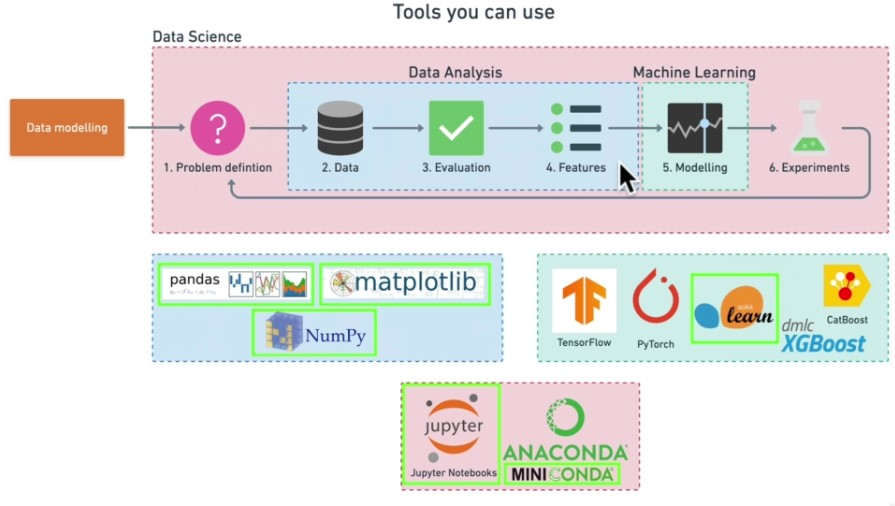# import our libraries

In [1]:
1. 
workflow = [
    '1. import data',
    '2. clean data',
    '3. import model',
    '4. create random seed',
    '5. create X and y data',
    '6. train and split data',
    '7. instatiate and fit model'
    '8. evaluate the model',
    '9. make predictions'
    '10. improve the model'
]

In [2]:
workflow

['1. import data',
 '2. clean data',
 '3. import model',
 '4. create random seed',
 '5. create X and y data',
 '6. train and split data',
 '7. instatiate and fit model8. evaluate the model',
 '9. make predictions10. improve the model']

# **All the tools we need**

In [3]:
# Regular for exploratory data analaysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


# models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
from sklearn.metrics import precision_score , recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## **Exploring our data**

In [4]:
df = pd.read_csv('heart-disease_uci.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape    # 303 rows, 14 columns

(303, 14)

## **Checking the various data types**

In [6]:
# everything is numeric
df.dtypes  # the various data types

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## **Checking if there are missing values**

In [7]:
# No NaNs
df.isna().sum()[:5]

age         0
sex         0
cp          0
trestbps    0
chol        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# **Data Exploration and Analysis  - EDA**

#### The goal is to find out more about the data and become a subject matter expert on the dataset you are working with
1. what questions are we trying to solve
2. what kind of data do we have and how do we treat different types
3. what's missing from the data and how do you deal with it
4. where are the outliers and why should you care about them?
5. how can you add change or remove features to get more out of the data

# There are 14 columns:

1.	age. The age of the patient.
2.	sex. The gender of the patient. (1 = male, 0 = female).
3.	cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).
4.	trestbps. Resting blood pressure in mmHg.
5.	chol. Serum Cholestero in mg/dl.
6.	fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
7.	restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
8.	thalach. Max heart rate achieved.
9.	exang. Exercise induced angina (1 = yes, 0 = no).
10.	oldpeak. ST depression induced by exercise relative to rest.
11.	slope. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
12.	ca. Number of major vessels (0–3) colored by flourosopy.
13.	thal. Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
14.	target. Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## **Data analysis - Count of heart disease**

In [10]:
# figure out the target and the class
# 1 = has heart disease
# 2 = no heart disease
df.target.value_counts().rename({1 :'has disease',0 :'has no disease'})

has disease       165
has no disease    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target'>

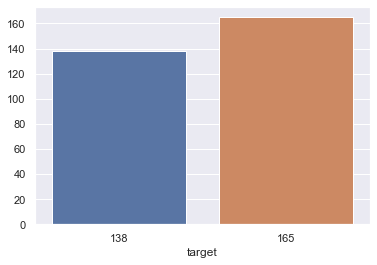

In [11]:
fig,ax=plt.subplots()
sns.barplot(data = df.target.value_counts().rename({1 :'has disease',0 :'has no disease'}), \
           x = df.target.value_counts().rename({1 :'has disease',0 :'has no disease'}).index, \
           y=df.target.value_counts().rename({1 :'has disease',0 :'has no disease'}).values,)



## **Data analysis - Count of heart disease by sex**

In [12]:
ast = df.loc[:, ['sex', 'target']]
ast.groupby('sex').count()

,target
sex,
0,96
1,207


In [13]:
ast1 = pd.crosstab(ast.sex, ast.target).rename({0:'no disease', 1: 'has disease'}, axis = 1)\
.rename({0:'female', 1: 'male'}, axis = 0).T
ast1

sex,female,male
target,,
no disease,24,114
has disease,72,93


<AxesSubplot:xlabel='target'>

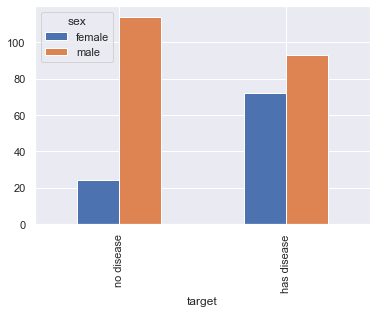

In [14]:
ast1.plot( kind = 'bar')

## Data analysis - age distribution

In [15]:
# data analysis - age distribution
age_explore = df['age'].value_counts(ascending = False)
age_explore.head()

58    19
57    17
54    16
59    14
52    13
Name: age, dtype: int64

[Text(0.5, 0, 'age'), Text(0, 0.5, 'number')]

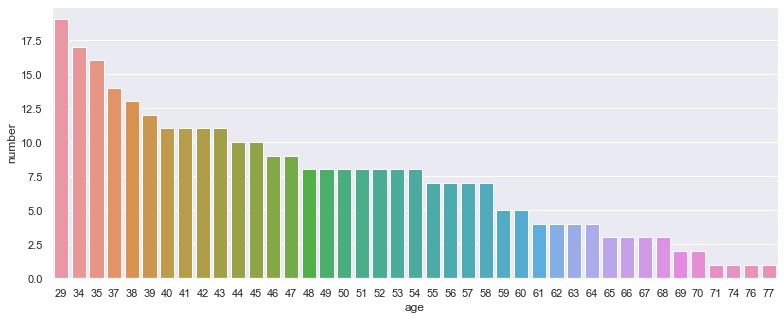

In [16]:
fig,ax= plt.subplots(figsize = (13,5))
sns.barplot(x =age_explore.index.sort_values(),y = age_explore.values)
ax.set(xlabel = 'age', ylabel = 'number')

## **Data analysis - Sex distribution**

In [17]:
sex_explore = df.loc[:,'sex'].to_frame()

In [18]:
sex_explore['label'] = ['male' if i == 1  else 'female' for i in sex_explore.sex]

In [19]:
sex_explore.label.value_counts()

male      207
female     96
Name: label, dtype: int64

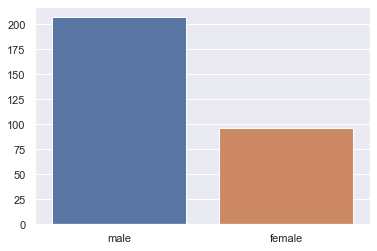

In [20]:
sns.barplot(x =sex_explore.label.value_counts().index, y = sex_explore.label.value_counts().values);

## **Chaecking feature correlations**

In [21]:
df.describe()[:3]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835


In [22]:
features = df
features.corr()[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239


# **Heatmap for features**

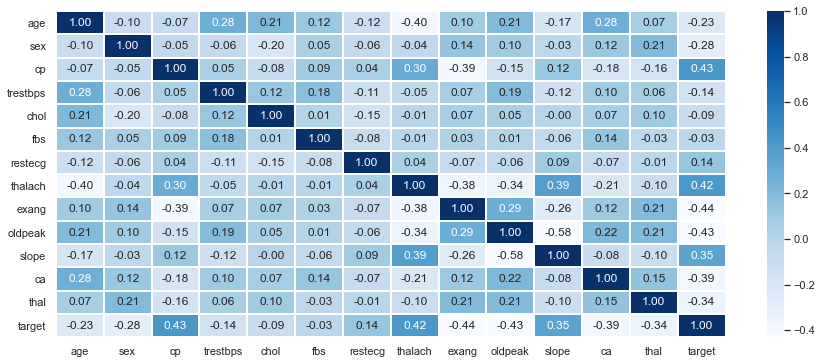

In [23]:
fig.ax =plt.subplots(figsize = (15,6))
sns.heatmap(features.corr(), annot = True, robust = True,cmap = 'Blues', linewidth = 1, fmt='0.2f');

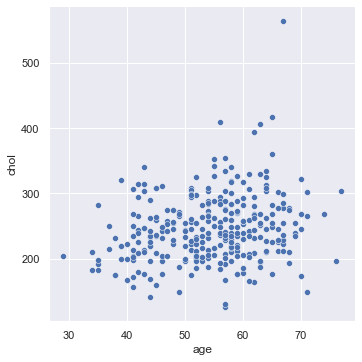

In [24]:
sns.relplot(x =features.age, y =features.chol);

In [25]:
features.age.corr(features.chol)

0.2136779565595618

# **Modelling Machine learning***

In [26]:
X= df.drop('target', axis = 1)
y = df['target']

# seed
np.random.seed(2)

# train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


###########################################################################################
# fit model using RandomForestClassifier



clf1 = RandomForestClassifier()
clf1.fit(X_train, y_train)

#predict model
y_pred1= clf1.predict(X_test)

print()

print('Using the RandomForestRegressor')
print('**************************************')
#evaluate model
print(f'training score : {clf1.score(X_train, y_train)}')
print(f'test score: {clf1.score(X_test, y_test)}')
rf_accuracy_score = accuracy_score(y_test, y_pred1)
print()

###########################################################################################
# fit model using LogisticRegression

model = LogisticRegression()   # solver ='lbfgs', max_iter=2000
model.fit(X_train, y_train)

#predict model
y_pred2= model.predict(X_test)

#evaluate model
print('Using the LogisticRegressor')
print('**************************************')
print(f'training score : {model.score(X_train, y_train)}')
print(f'test score:  {model.score(X_test, y_test)}')
lr_accuracy_score = accuracy_score(y_test, y_pred2)
print()
###########################################################################################

print('Using the KNeighborsClassifier')
print('**************************************')
# fit model using KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
#predict model
y_pred3= neigh.predict(X_test)


print(f'training score : {neigh.score(X_train, y_train)}')
knn_accuracy_score =     neigh.score(X_test, y_test)
print(f'accuracy score:  {accuracy_score(y_test, y_pred3)*100:0.2f}%')


Using the RandomForestRegressor
**************************************
training score : 1.0
test score: 0.8852459016393442

Using the LogisticRegressor
**************************************
training score : 0.8305785123966942
test score:  0.9016393442622951

Using the KNeighborsClassifier
**************************************
training score : 0.7396694214876033
accuracy score:  70.49%


C:\Users\godwi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
model_evaluation = {'RandomForest score' :rf_accuracy_score,
              "LogisticRegressor score" :lr_accuracy_score,
              "KNeighbours score"    : knn_accuracy_score}


In [28]:
model_score = pd.DataFrame(index = model_evaluation.keys(), \
data = (model_evaluation.values())\
, columns = ['accuracy_scores']).sort_values('accuracy_scores',ascending = False)
model_score

,accuracy_scores
LogisticRegressor score,0.901639
RandomForest score,0.885246
KNeighbours score,0.704918


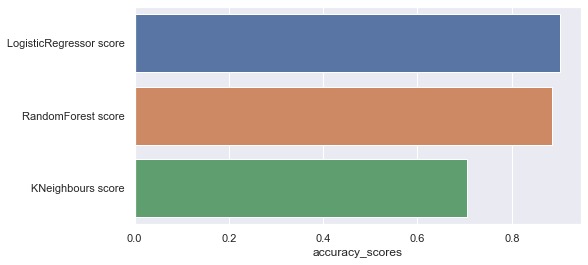

In [29]:
fig,ax = plt.subplots(figsize= (8,4))
sns.barplot(data = model_score, y = model_score.index, \
            x= model_score.accuracy_scores, orient ='h');

# **Verdit from the baseline training of the model**
The base line evaluation score without additional tuning are in the order of 
1.  LogisticsRegressor scores 88%
2.  RandomForest performs 2nd with 85%
3.  KNeighbour scored least at 68%

## **Confusion Matrix - we will use the Logistic Regressor since it has the greatest score**

In [30]:
# Confusion Matrix
#clf1 
confusion_matrix(y_test,y_pred2)

array([[26,  6],
       [ 0, 29]], dtype=int64)

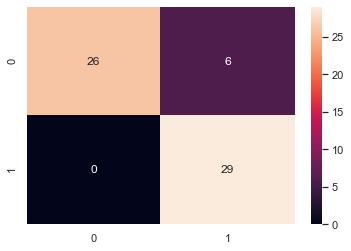

In [31]:
sns.heatmap(confusion_matrix(y_test,y_pred2),annot = True);

## **Classification Report**

In [32]:
cr = classification_report(y_test, y_pred2)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        32
           1       0.83      1.00      0.91        29

    accuracy                           0.90        61
   macro avg       0.91      0.91      0.90        61
weighted avg       0.92      0.90      0.90        61



## **Precision Score**

In [33]:
precision_score(y_test, y_pred2)

0.8285714285714286

## **F1 score**

In [34]:
f1_score(y_test, y_pred2)

0.90625

# **Tunning the model with RandoMSearchCV Method**

In [35]:
# Randomized Search CV Tunining

# import hyperparameter tuning with randomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

grid = {"solver":['liblinear'],
       'C' : np.random.random(100),
       'max_iter':[250]}

# create seed
np.random.seed(2)

# create X and y
X= df.drop('target', axis = 1)
y = df['target']


# train and split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2)

# instantiate RandomForest Classifier
logistic = LogisticRegression()  # n_jobs is the number of cores you want to use for computing

# setup RandomizedSearchCV
rs_clf =RandomizedSearchCV (estimator = logistic,
                          param_distributions = grid,
                          n_iter = 20,
                          cv=10,
                          verbose = 0)

# fint the RandomizedSearchCV version of fit
rs_clf.fit(X_train, y_train)

print(rs_clf.score(X_test, y_test))
#**********************************************************************************************************************
# make predictions  with the best hyperparamaters
rs_ypreds = rs_clf.predict(X_test)

print(accuracy_score(y_test, rs_ypreds))

0.9180327868852459
0.9180327868852459


In [36]:
rs_clf.best_params_

{'solver': 'liblinear', 'max_iter': 250, 'C': 0.28026828777019874}

In [37]:
model_score

,accuracy_scores
LogisticRegressor score,0.901639
RandomForest score,0.885246
KNeighbours score,0.704918


# **After Tunnning with RandomSearchCV LogisticRegresison still maintained 88%**
#The base line evaluation score without additional tuning are in the order of 
## 1.  LogisticsRegressor accuracy scores 92%
## 2.  Precision score  = 0.88%
## 3.  F1 score  = 89%